# Movie Recommender System 

**GROUP 22**
- **Collaborators**<br>
Lucy Munge <br>
Frank Mandele<br>
Sylvester Magunda<br>



## Project Overview

## Business Understanding

MovieLens aims to enhance its movie recommendation system featured on users' homepages. The objective is to leverage users' movie ratings to suggest additional films, ultimately streamlining the decision-making process for users when choosing which movie to watch.

## Data Understanding

The dataset used in this project is from MovieLens and here is the link https://grouplens.org/datasets/movielens/latest/. 

The data are contained in four different files which are all loaded and viewed. The files are movies.csv, ratings.csv, links.csv, and tags.csv

## Importing Libraries

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Loading Dataset

In [5]:
# load and view the first 5 rows of movies_csv 
movies_df = pd.read_csv('Data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# check a concise summary of the dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
# load and view the first 5 rows of ratings_csv 
ratings_df = pd.read_csv('Data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# check a concise summary of the dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
# load and view the first 5 rows of links_csv 
links_df = pd.read_csv('Data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
# check a concise summary of the dataset
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [12]:
# load and view the first 5 rows of tags_csv 
tags_df = pd.read_csv('Data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
# check a concise summary of the dataset
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [15]:
# check the popularity of each unique element in tag column
tags_df['tag'].value_counts()

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
funny                 23
                    ... 
different              1
cate blanchett         1
not funny              1
video                  1
gun-fu                 1
Name: tag, Length: 1589, dtype: int64

Some observations from dataset:
- The most popular tag is "In Netflix queue". However, this is not important in our future analysis since it doesn't really explain a specific genre of movie and the tag can apply in any kind of a movie.
- We will mainly focus on movies_df and ratings_df. We need to merge them to have movie names in our merged dataset.

## Exploratory Data Analysis and Data Cleaning

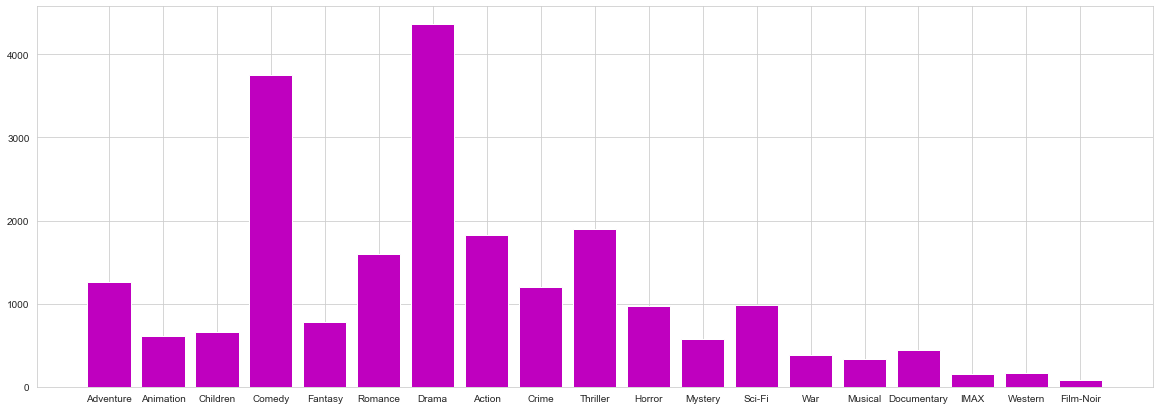

In [60]:
# bar graph showing most popular genres of movie released 
plt.figure(figsize=(20,7))
genre_list = movies_df['genres'].apply(lambda genre_list_movie : str(genre_list_movie).split("|"))
genre_counts = {}

for genre_list_movie in genre_list:
    for genre in genre_list_movie:
        if(genre_counts.get(genre,False)):
            genre_counts[genre]=genre_counts[genre]+1
        else:
            genre_counts[genre] = 1       
genre_counts.pop("(no genres listed)")
plt.bar(genre_counts.keys(),genre_counts.values(),color='m');

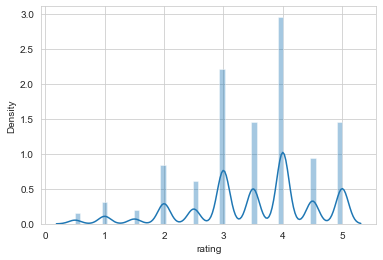

In [18]:
# create a distribution plot for users rating
sns.distplot(ratings_df["rating"]);

Generally, most movies were rated 4 while the rating with the least number of movies was 0.5

In [19]:
# merge ratings_df and movies_df

merged_df = pd.merge(movies_df, ratings_df, on='movieId', how='inner')
merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [20]:
# drop the timestamp column
merged_df = merged_df.drop('timestamp', axis=1)


- ratings_df  has **timestamp** column. We dont use this feature for the future analysis. It can therefore be dropped.

In [22]:
# check a concise summary of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [25]:
# check for null values
merged_df.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

- There are no null values in the merged dataset
- The dropping was successfull because the number of columns reduced from 6 to 5

In [23]:
# check the total value of each unique element in the userId column
merged_df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

- **userId 414** is the most popular user in the dataset, appearing 2698 times. There are several number of users appearing least in the dataset, that is 20 times.

In [26]:
# removing release year from movie title
merged_df['year'] = merged_df['title'].str.extract('.*\((.*)\).*',expand = False)
merged_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', '2006–2007'], dtype=object)

In [28]:
# changing 2006-2007 to 2007
merged_df['year'] = merged_df['year'].replace('2006–2007','2007')
merged_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

- Logically, if a movie was released between 2006 and 2007 then the latest year serves as the release year. We didn't drop the record since we wanted to stick with the original data as much as possible for accuracy purposes.

In [31]:
# checking for null values in the new dataset
merged_df.isna().sum()

movieId     0
title       0
genres      0
userId      0
rating      0
year       17
dtype: int64

- The year column has 17 null values

In [34]:
# view the records with no year values
nullyears_df = merged_df[pd.isna(merged_df['year'])]
nullyears_df

,movieId,title,genres,userId,rating,year
81292,40697,Babylon 5,Sci-Fi,210,4.0,NaN
81293,40697,Babylon 5,Sci-Fi,528,0.5,NaN
99325,140956,Ready Player One,Action|Sci-Fi|Thriller,209,3.5,NaN
99326,140956,Ready Player One,Action|Sci-Fi|Thriller,305,4.5,NaN
99327,140956,Ready Player One,Action|Sci-Fi|Thriller,380,3.0,NaN
99328,140956,Ready Player One,Action|Sci-Fi|Thriller,514,3.0,NaN
99459,143410,Hyena Road,(no genres listed),448,2.0,NaN
99526,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),105,5.0,NaN
99617,149334,Nocturnal Animals,Drama|Thriller,306,3.0,NaN
99799,156605,Paterson,(no genres listed),567,4.5,NaN


In [36]:
# drop the records that don't have release year
merged_df = merged_df.dropna(subset=['year'],how='any')
merged_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [38]:
# checking summary of the dataset to confirm there are no null records
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100819 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100819 non-null  int64  
 1   title    100819 non-null  object 
 2   genres   100819 non-null  object 
 3   userId   100819 non-null  int64  
 4   rating   100819 non-null  float64
 5   year     100819 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.4+ MB


In [47]:
# checking for duplicates
merged_df.duplicated().sum()

0

- There are no duplicates

In [39]:
# exporting the clean merged dataframe to a csv file
merged_df.to_csv('merged_df.csv',index=False)

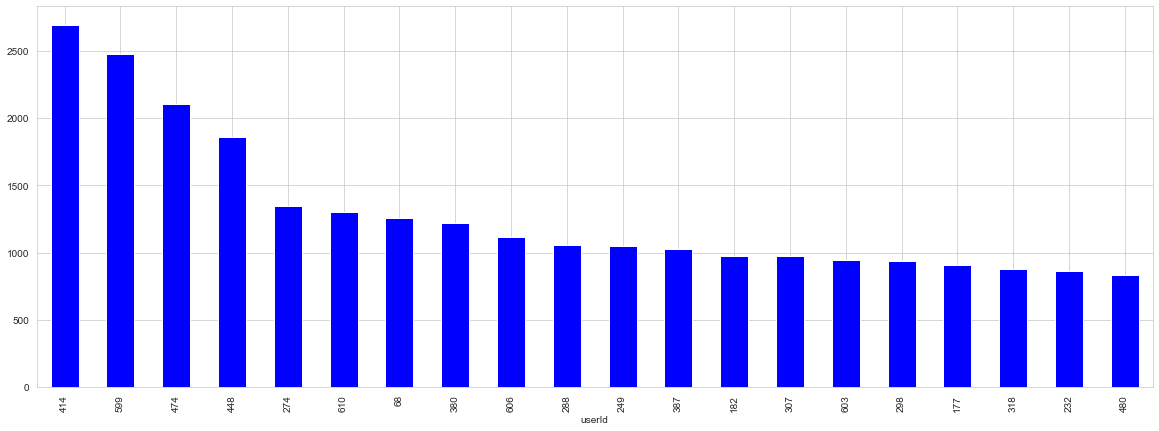

In [41]:
# grouping the rating based on user

ratings_by_users = merged_df.groupby('userId').agg({'rating': [np.size, np.mean]})
ratings_by_users['rating']['size'].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,7), color = 'blue');

- The above graph displays users who rated mostly with user 414 rating most

In [42]:
# checking the details of the most rating user
user_414 = merged_df[merged_df['userId'] == 414]
user_414


,movieId,title,genres,userId,rating,year
146,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,414,4.0,1995
281,2,Jumanji (1995),Adventure|Children|Fantasy,414,3.0,1995
361,3,Grumpier Old Men (1995),Comedy|Romance,414,4.0,1995
414,5,Father of the Bride Part II (1995),Comedy,414,2.0,1995
502,6,Heat (1995),Action|Crime|Thriller,414,3.0,1995
...,...,...,...,...,...,...
100691,180045,Molly's Game (2017),Drama,414,4.0,2017
100701,180497,The Post (2017),Drama|Thriller,414,4.0,2017
100705,180985,The Greatest Showman (2017),Drama,414,3.5,2017
100762,184791,Fred Armisen: Standup for Drummers (2018),Comedy,414,2.5,2018


- From the top 5 and last 5 last records of user_414, it is clear that averagely the ratings were bewteen 2-4

In [44]:
# grouping the ratings based on movies
ratings_by_movies = merged_df.groupby('title').agg({'rating': [np.size, np.mean]})
ratings_by_movies

rating          
                                            size      mean
title                                                     
'71 (2014)                                   1.0  4.000000
'Hellboy': The Seeds of Creation (2004)      1.0  4.000000
'Round Midnight (1986)                       2.0  3.500000
'Salem's Lot (2004)                          1.0  5.000000
'Til There Was You (1997)                    2.0  4.000000
...                                          ...       ...
eXistenZ (1999)                             22.0  3.863636
xXx (2002)                                  24.0  2.770833
xXx: State of the Union (2005)               5.0  2.000000
¡Three Amigos! (1986)                       26.0  3.134615
À nous la liberté (Freedom for Us) (1931)    1.0  1.000000

[9707 rows x 2 columns]

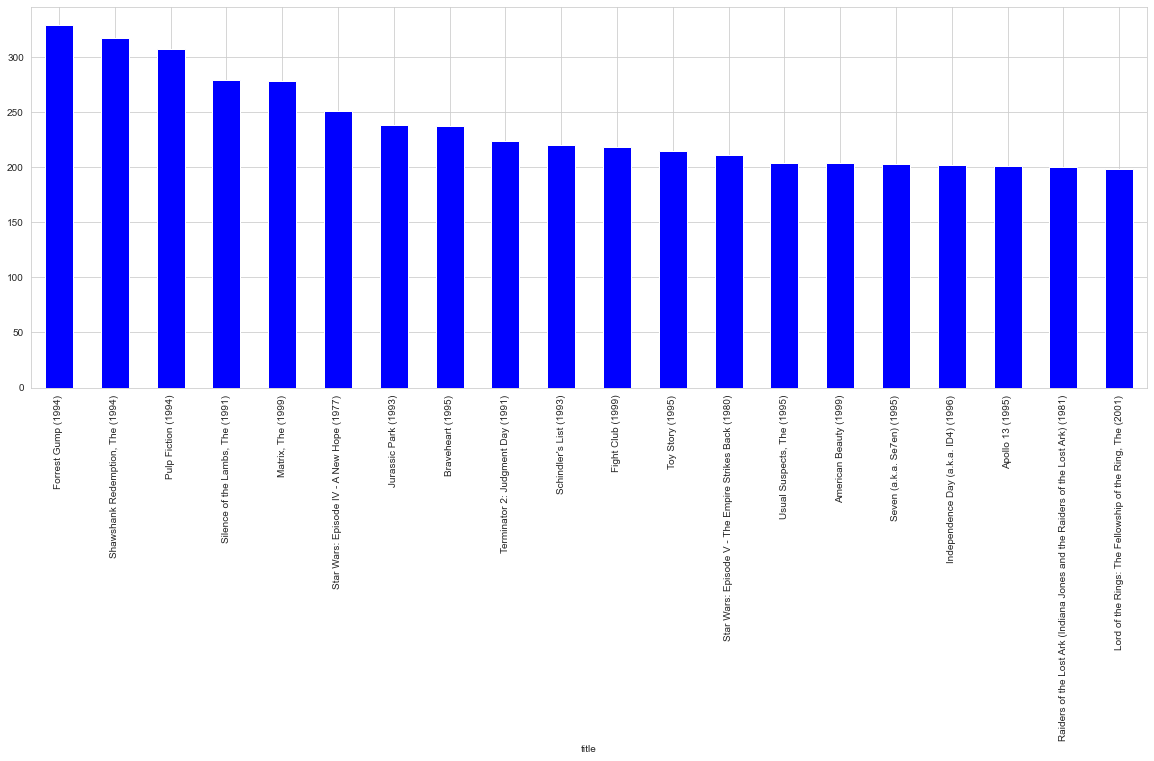

In [45]:
# most rated movies 
ratings_by_movies['rating']['size'].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,7), color = 'blue');

- Movie ratings are unevenly distributed, with the film "Forrest Gump" being the most rated, receiving approximately 350 ratings.

In [46]:
# check the most popular movies 
popular_ratings_by_movies = ratings_by_movies[ratings_by_movies['rating']['size']>200]
popular_ratings_by_movies['rating']['mean'].sort_values( ascending=False).head(10)

title
Shawshank Redemption, The (1994)                         4.429022
Fight Club (1999)                                        4.272936
Usual Suspects, The (1995)                               4.237745
Star Wars: Episode IV - A New Hope (1977)                4.231076
Schindler's List (1993)                                  4.225000
Star Wars: Episode V - The Empire Strikes Back (1980)    4.215640
Pulp Fiction (1994)                                      4.197068
Matrix, The (1999)                                       4.192446
Forrest Gump (1994)                                      4.164134
Silence of the Lambs, The (1991)                         4.161290
Name: mean, dtype: float64

- Utilizing the **ratings_by_users** and **ratings_by_movies** tables will provide insights into which movies are highly appreciated or well-reviewed in our database. This information will be employed in subsequent sections for further analysis.

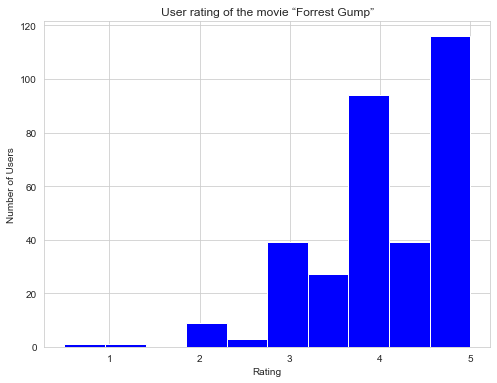

In [50]:
# User rating of the movie “Forrest Gump”

plt.figure(figsize=(8,6))
movies_grouped = merged_df.groupby('title')
Forrest_Gump = movies_grouped.get_group('Forrest Gump (1994)')
Forrest_Gump['rating'].hist(color = 'blue')
plt.title('User rating of the movie “Forrest Gump”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()



- Most of the '**Forrest Gump**' audience ratings are 4 and 5.

- The genres column contains multiple genres.As a result, we need to separate them to conduct a meaningful analysis.

In [51]:
# split and check the value count for each genre
genre_popularity = (movies_df.genres.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: genres, dtype: int64

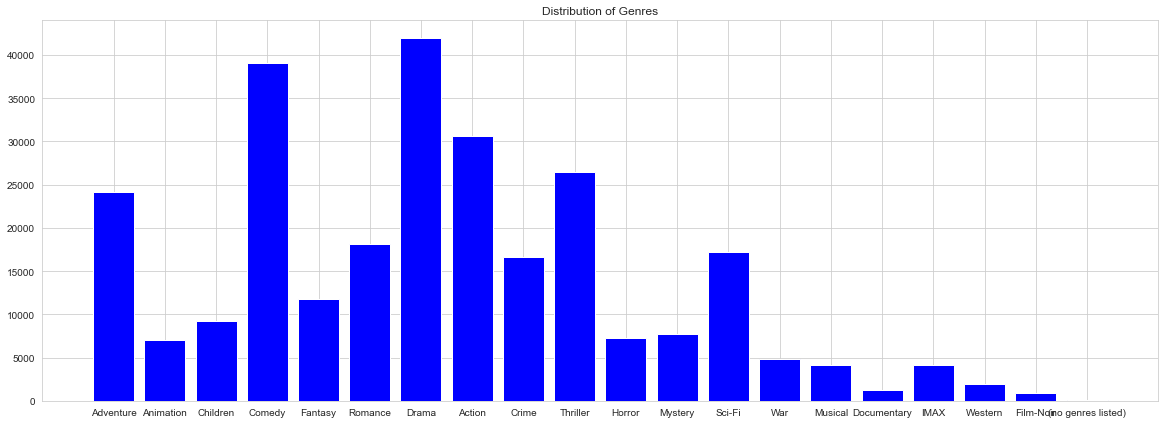

In [52]:
# distribution of genres

plt.figure(figsize=(20,7))
genres = merged_df['genres'].apply(lambda genres_movie : str(genres_movie).split("|"))

genres_count = {}
for genres_movie in genres:
    for genre in genres_movie:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
plt.bar(genres_count.keys(),genres_count.values(),color='blue');
plt.title('Distribution of Genres');


- The majority of movies fall into the genre of Drama, with Comedy coming next, followed by Action, Thriller, and Adventure.

In [54]:
# the average rating for the entire dataset
merged_df.rating.mean()

3.501547327388687

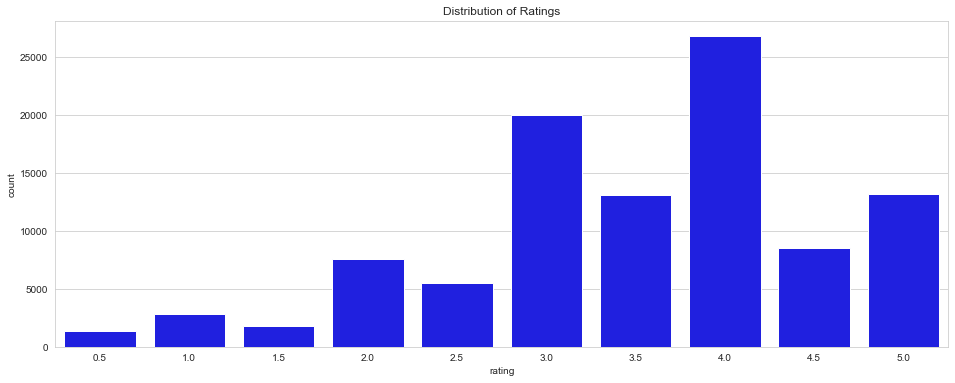

In [56]:
# distribution of ratings
plt.figure(figsize=(16,6))
sns.countplot(merged_df['rating'], color = 'blue')
plt.title('Distribution of Ratings');

- The mean rating is 3.50 on a scale of 5.
- It seems that ratings are not normally distibuted.
- Nearly half the movies have a rating between 4 and 5.

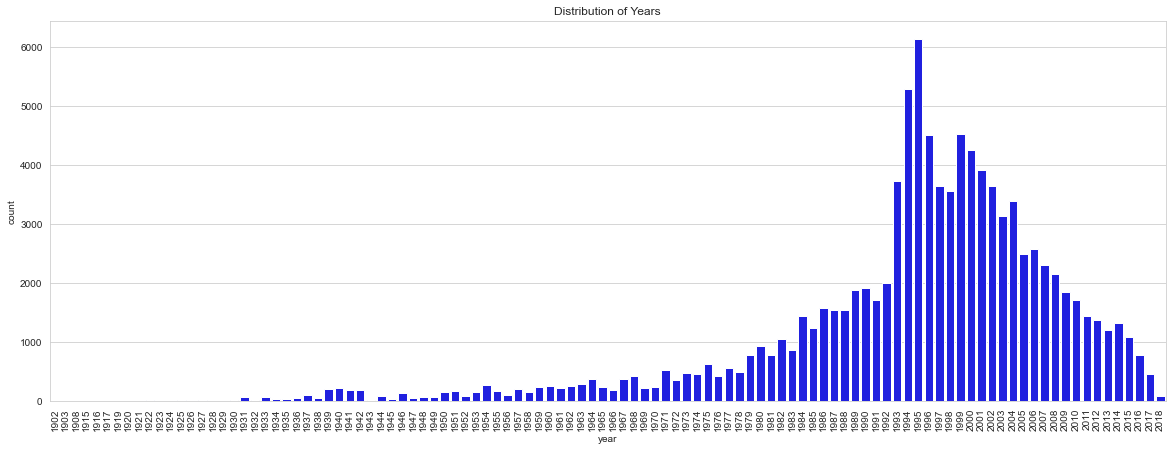

In [58]:
# distribution of year
df_year_asc = merged_df.sort_values('year' , ascending = True)
plt.figure(figsize=(20,7))
sns.countplot(df_year_asc['year'], color = 'blue')
plt.xticks(rotation=90)
plt.title('Distribution of Years');

- The dataset encompasses movies dating back to 1902, with the most recent film recorded in 2018. Among the years 1993 to 2004, the year with the highest number of rated movies in this dataset is notable.